# Laboratorio 1
 - Juan José Osorio - 202021720
 - Pablo Guatibonza - 202014393 
 - Juan Sebastián Hoyos - 201822167
##  1. Entendimiento de los datos
### 1.1 Importación de librerías




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import seaborn as sns; sns.set()  # for plot styling
from kneed import KneeLocator

### 1.2. Carga de los datos


In [3]:
df_bicialpes = pd.read_csv(
    './datos/datosBiciAlpes.csv', 
    sep = ';', 
    encoding = 'ISO-8859-1', 
    index_col = False,
    )


### 1.3. Entendimiento de los datos

In [4]:
df_bicialpes.shape

(5338, 14)

In [5]:
df_bicialpes.head()

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
0,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3
1,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,0,1,3
2,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,3,1,3
3,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,2
4,Mañana,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3


In [6]:
df_bicialpes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Time                                         5338 non-null   object 
 1   Number_of_Casualties                         5338 non-null   int64  
 2   Day_of_Week                                  5319 non-null   object 
 3   Road_Type                                    5338 non-null   int64  
 4   Speed_limit                                  5338 non-null   float64
 5   Light_Conditions                             5338 non-null   int64  
 6   Weather_Conditions                           5338 non-null   int64  
 7   Road_Surface_Conditions                      5338 non-null   int64  
 8   Urban_or_Rural_Area                          5338 non-null   int64  
 9   Vehicle_Type                                 5338 non-null   object 
 10  

In [7]:
df_bicialpes.describe()

,Number_of_Casualties,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
count,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000
mean,1.118022,5.587486,33.522855,1.712814,1.532222,1.191083,1.243162,1.247096,1.898464,1.001124,2.630761
std,0.330694,1.416573,10.206576,1.456428,1.760695,0.590522,0.429032,0.453389,2.456249,0.033511,0.518214
min,1.000000,1.000000,15.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
50%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000
75%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000
max,4.000000,9.000000,70.000000,7.000000,9.000000,5.000000,2.000000,3.000000,9.000000,2.000000,3.000000


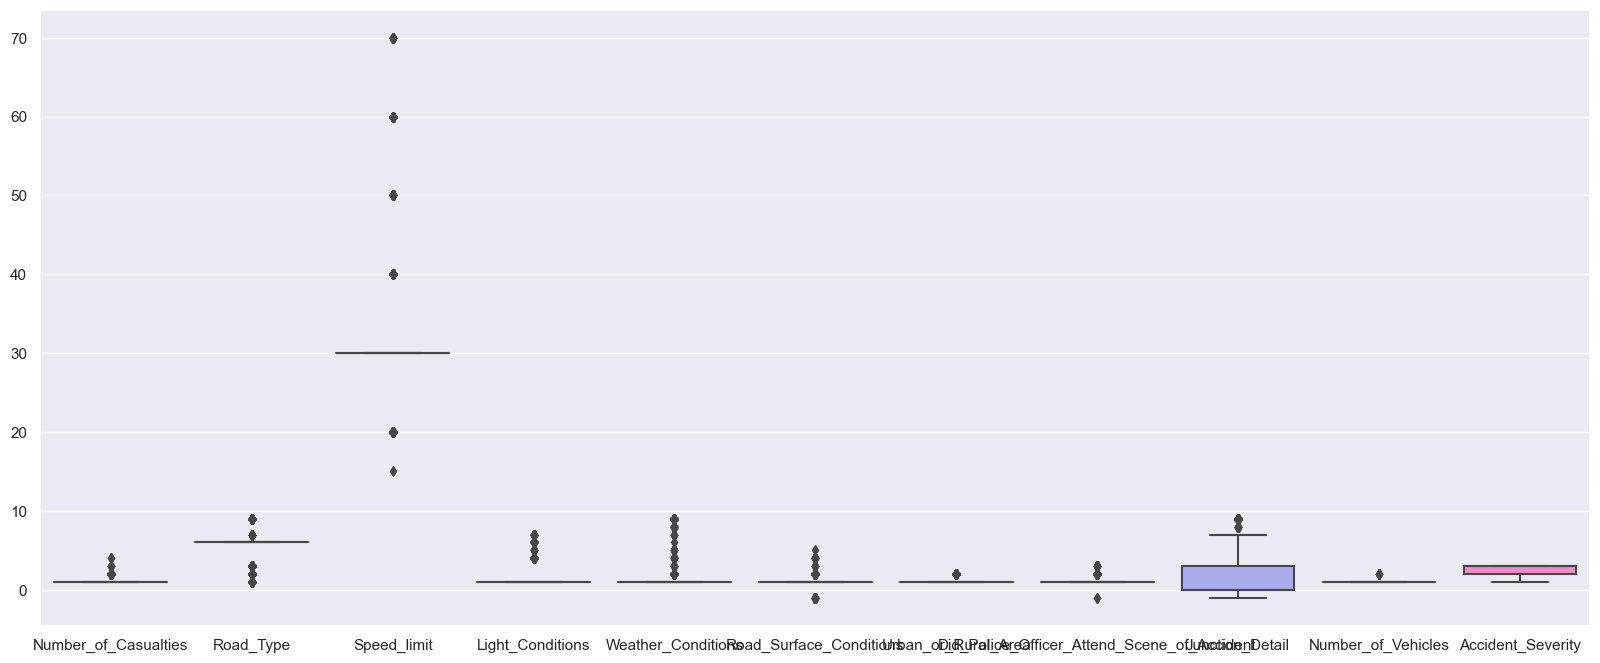

In [8]:
# Visualizacion de las variables numericas y categoricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_bicialpes, orient="v")

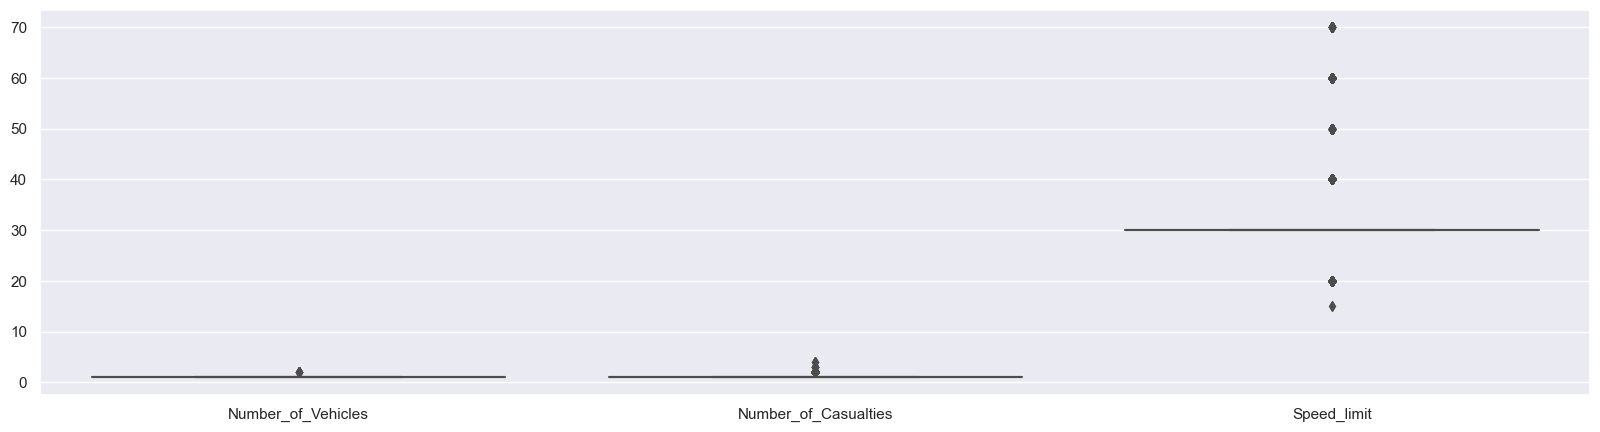

In [9]:
# Visualización de las variables numericas
fig = plt.figure(figsize=(20,5))
data = df_bicialpes[['Number_of_Vehicles','Number_of_Casualties','Speed_limit']]
ax = sns.boxplot(data=data, orient="v")

In [10]:
# Revisamos el contenido de las variables numericas
df_bicialpes[['Number_of_Vehicles','Number_of_Casualties','Speed_limit']].describe()

,Number_of_Vehicles,Number_of_Casualties,Speed_limit
count,5338.000000,5338.000000,5338.000000
mean,1.001124,1.118022,33.522855
std,0.033511,0.330694,10.206576
min,1.000000,1.000000,15.000000
25%,1.000000,1.000000,30.000000
50%,1.000000,1.000000,30.000000
75%,1.000000,1.000000,30.000000
max,2.000000,4.000000,70.000000


In [11]:
# Separación de la variable Speed limit (float) de variables int para ver mejor su contenido dada la diferencia de magnitudes en el dominio
name_cols_float = data.select_dtypes(include = ['float']).columns
name_cols_int = data.select_dtypes(include = ['int64']).columns
name_cols_int
#name_cols_float

Index(['Number_of_Vehicles', 'Number_of_Casualties'], dtype='object')

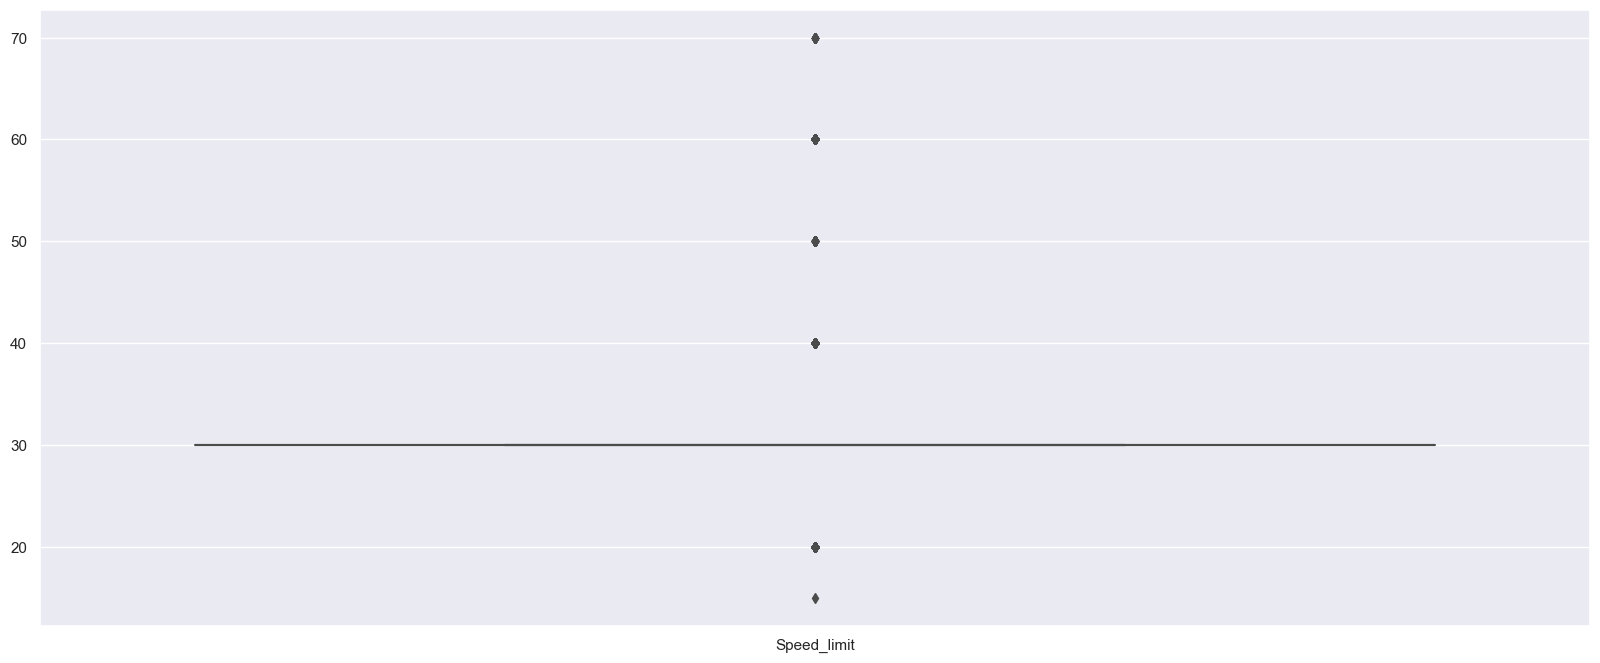

In [12]:
# Visualización de variables float
fig = plt.figure(figsize = (20, 8))
ax = sns.boxplot(data=df_bicialpes[name_cols_float], orient = "v")

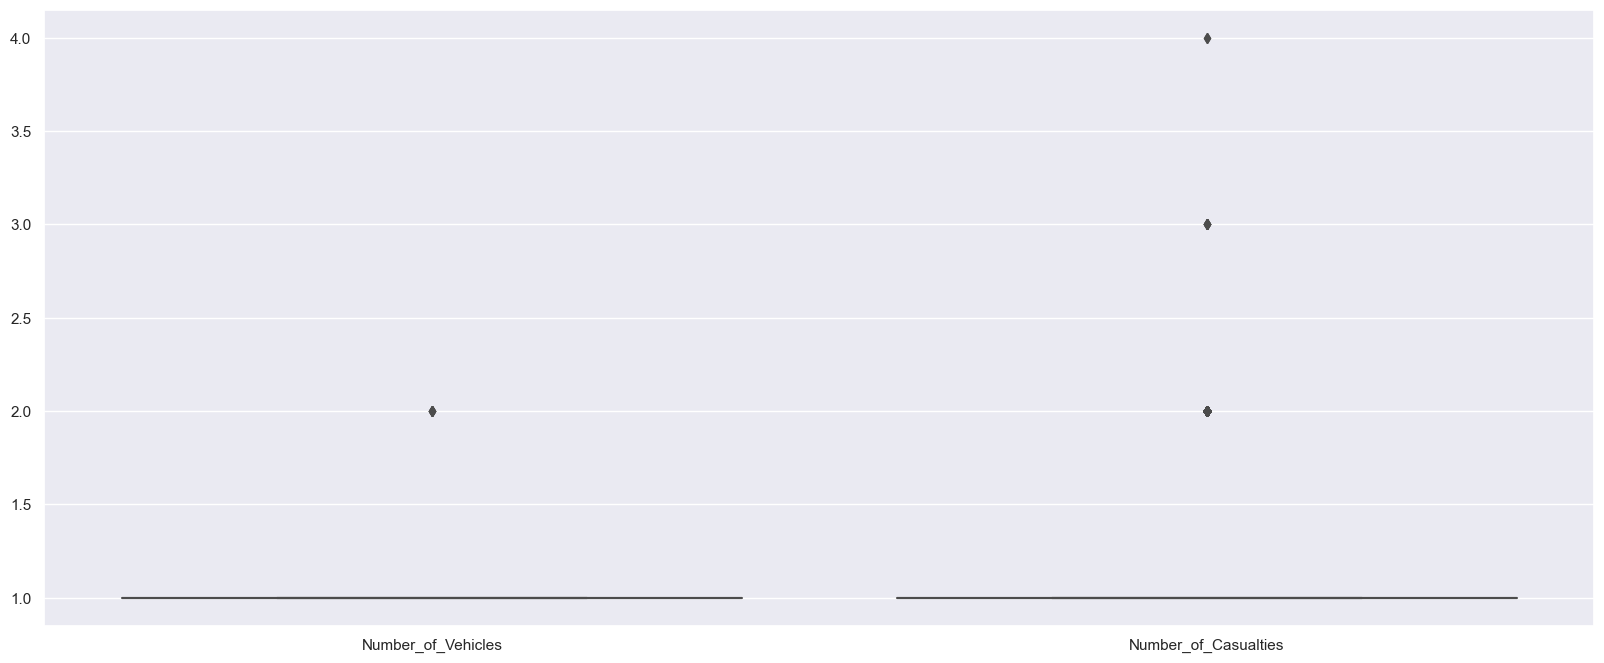

In [13]:
# Visualización de variables int
fig = plt.figure(figsize = (20, 8))
ax = sns.boxplot(data=df_bicialpes[name_cols_int], orient = "v")

In [14]:
# Exploramos variables que no sean numericas

name_cols_non_number = df_bicialpes.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Time', 'Day_of_Week', 'Vehicle_Type'], dtype='object')

In [15]:
# Revisamos el contenido de las variables no numericas
df_bicialpes[name_cols_non_number].describe()

,Time,Day_of_Week,Vehicle_Type
count,5338,5319,5338
unique,4,2,1
top,Tarde,Día laboral,bike
freq,2171,3832,5338


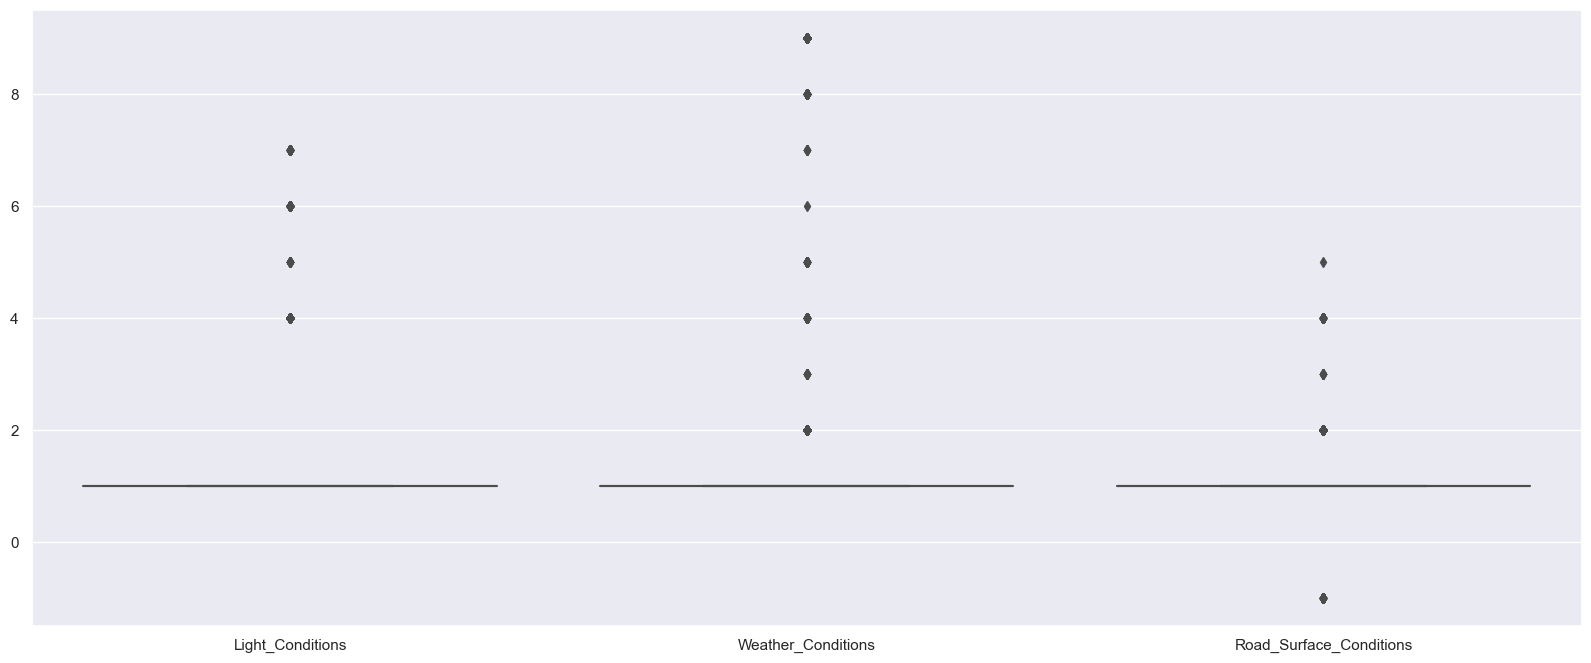

In [16]:
# Visualización de las variables categoricas Light_Conditions, Weather_Conditions, Road_Surface_Conditions

categorical_data = df_bicialpes[['Light_Conditions','Weather_Conditions','Road_Surface_Conditions']]
fig = plt.figure(figsize = (20, 8))
ax = sns.boxplot( data = categorical_data)


In [17]:
# Revisamos el contenido de las variables categoricas Light_Conditions, Weather_Conditions, Road_Surface_Conditions
categorical_data.describe()

,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
count,5338.000000,5338.000000,5338.000000
mean,1.712814,1.532222,1.191083
std,1.456428,1.760695,0.590522
min,1.000000,1.000000,-1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,7.000000,9.000000,5.000000


## 2. Preparación de los datos

### 2.1 Completitud

In [18]:
# Se calcula el porcentaje de valores nulos por columna
(df_bicialpes.isnull().sum()/df_bicialpes.shape[0]).sort_values(ascending=False)

Day_of_Week                                    0.003559
Time                                           0.000000
Number_of_Casualties                           0.000000
Road_Type                                      0.000000
Speed_limit                                    0.000000
Light_Conditions                               0.000000
Weather_Conditions                             0.000000
Road_Surface_Conditions                        0.000000
Urban_or_Rural_Area                            0.000000
Vehicle_Type                                   0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000000
Junction_Detail                                0.000000
Number_of_Vehicles                             0.000000
Accident_Severity                              0.000000
dtype: float64

### 2.2 Unicidad / Duplicidad

Para este caso, no importa si hay valores duplicados pues es posible que ocurra más de un accidente bajo las mismas condiciones que otro.

### 2.3 Consistencia
#### 2.3.1 Categóricos
La mayoría de los datos están completos, es decir, no tienen campos nulos. Aunque el campo Day_of_week presenta un porcentaje de nulos, esta información no la consideramos relevante puesto que un dia de la semana no es determinante de un accidente vial

In [19]:
#VERIFICAMOS LOS VALORES DE TIME
df_bicialpes['Time'].value_counts()

Tarde        2171
Mañana       1684
Noche        1477
Madrugada       6
Name: Time, dtype: int64

In [20]:
#VERIFICAMOS LOS VALORES DE DAY OF WEEK
df_bicialpes['Day_of_Week'].value_counts()

Día laboral      3832
Fin de semana    1487
Name: Day_of_Week, dtype: int64

In [21]:
#VERIFICAMOS LOS VALORES DE VEHICLE TYPE
df_bicialpes['Vehicle_Type'].value_counts()

bike    5338
Name: Vehicle_Type, dtype: int64

#### 2.3.2 Númericos

In [22]:
#VERIFICAMOS LOS VALORES NUMERICOS PARA SABER SI LOS VALORES SON CONSISTENTES
number_cols = df_bicialpes.dtypes[(df_bicialpes.dtypes == np.int64) | (df_bicialpes.dtypes == np.float64)].index
number_cols = df_bicialpes.select_dtypes(include = ['int','float']).columns
df_bicialpes[number_cols].describe()

,Number_of_Casualties,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
count,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000
mean,1.118022,5.587486,33.522855,1.712814,1.532222,1.191083,1.243162,1.247096,1.898464,1.001124,2.630761
std,0.330694,1.416573,10.206576,1.456428,1.760695,0.590522,0.429032,0.453389,2.456249,0.033511,0.518214
min,1.000000,1.000000,15.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
50%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000
75%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000
max,4.000000,9.000000,70.000000,7.000000,9.000000,5.000000,2.000000,3.000000,9.000000,2.000000,3.000000


### 2.4 Validez / Estandarización
#### Todos los datos cumplen con la estandarización

## 3. Modelamiento

### 3.1 Selección de variables 
Para este caso se tomarán inicialmente 2 variables, las cuales son categoricas. Estas son weather condition y Junction detail, puesto que consideramos determinantes estas variables en los accidentes viales de bicicletas


In [23]:
selected_cols=['Weather_Conditions','Junction_Detail']

### 3.2 Preparación de los datos 
Debido a que usaremos algoritmos que requieren datos númericos, es necesario convertir los datos categoricos a numeros. Sin embargo, los datos categoricos ya están transformados en números

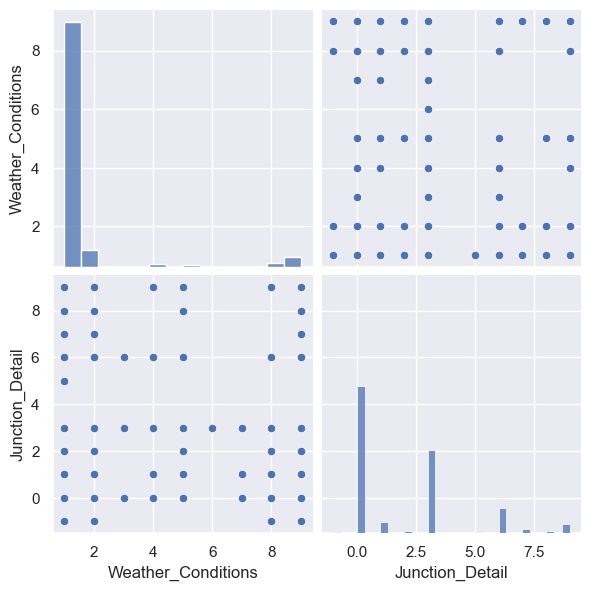

In [24]:
sns.pairplot(df_bicialpes, height=3,vars=selected_cols,kind='scatter')


### 3.3 Construcción de modelos
#### 3.3.1 Construcción K-means()


##### 3.3.1.1 Ajuste del modelo


In [25]:
# Debido a que empezaremos despacio, usaremos solamente 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0) # 2 clusters


kmeansp = kmeans.fit(df_bicialpes[selected_cols]) # las columnas seleccionadas fueron las que se graficaron en el parplot

/Users/juansebastian/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
cols_number=df_bicialpes[selected_cols].to_numpy() # convertimos las columnas seleccionadas a un arreglo de numpy
cols_number

array([[1, 3],
       [1, 0],
       [1, 3],
       ...,
       [5, 3],
       [1, 6],
       [1, 0]])

##### 3.3.1.2 Visualización del resultado


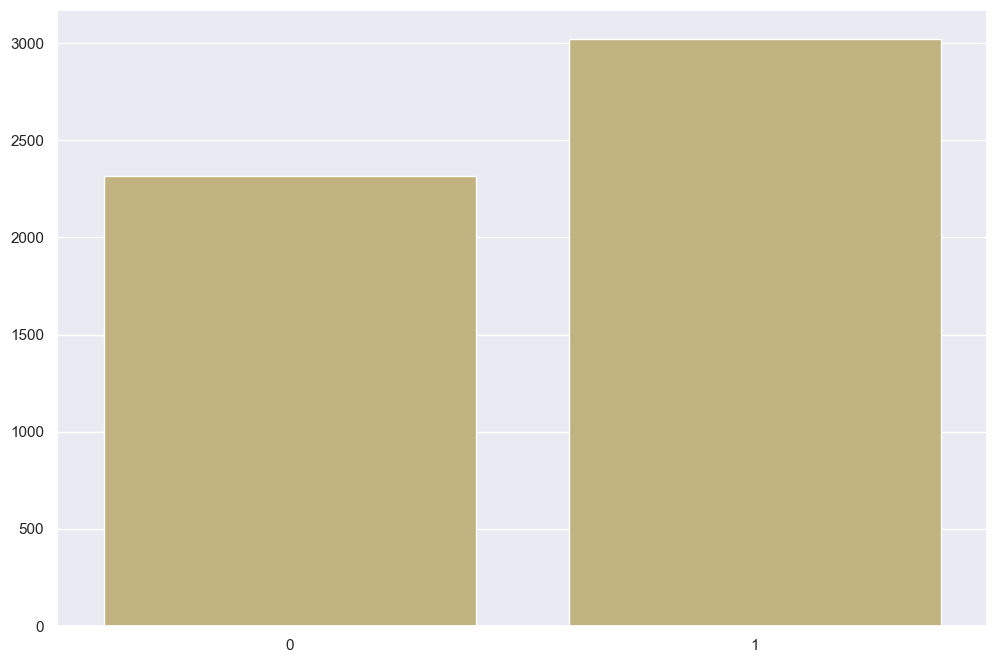

In [27]:
labels=kmeansp.labels_ # obtenemos los labels de los clusters
df_bicialpes['Cluster']=labels # agregamos los labels a nuestro dataframe
cluster_distrib=df_bicialpes['Cluster'].value_counts() # obtenemos la distribucion de los clusters

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='y');

In [28]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_bicialpes.groupby('Cluster').count()

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
Cluster,,,,,,,,,,,,,,
0,2317,2317,2310,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317
1,3021,3021,3009,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021


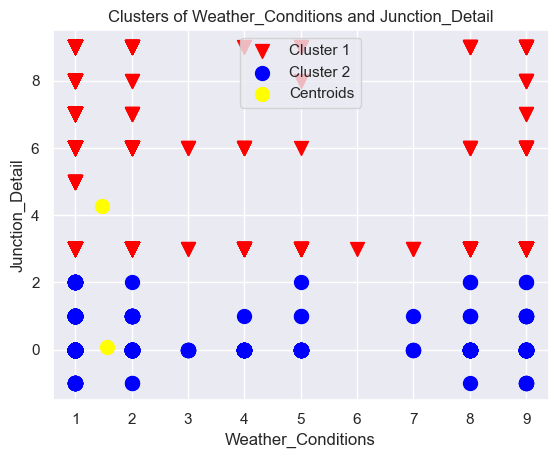

In [29]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number[kmeans.labels_ == 0, 0], cols_number[kmeans.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans.labels_ == 1, 0], cols_number[kmeans.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Weather_Conditions and Junction_Detail')
plt.xlabel(selected_cols[0])
plt.ylabel(selected_cols[1])
plt.legend()
plt.show()

In [30]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[',selected_cols[0], ' ' , selected_cols[1], ']]', kmeans.cluster_centers_)

Centroides: [[ Weather_Conditions   Junction_Detail ]] [[1.48338369 4.26931377]
 [1.56967891 0.08010593]]


##### 3.3.1.3 Número optimo de clusteres de acuerdo al metodo del codo

In [31]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

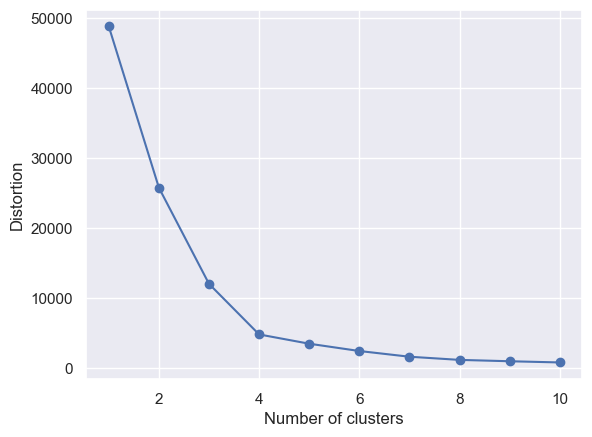

In [32]:
plot_distortion(df_bicialpes[selected_cols],1,11)

##### 3.3.1.4 Construcción de nuevo modelo con la cantidad de clusters obtenida anteriormente 




In [33]:
n_clusters=10
df_bicialpes_prep=df_bicialpes[selected_cols]
kmeans2=KMeans(n_clusters=n_clusters,random_state=0)
kmeans2=kmeans2.fit(df_bicialpes_prep)

/Users/juansebastian/.pyenv/versions/3.9.0/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##### 3.3.1.5 Visualización resultados


/var/folders/tx/3ms3qfwn6sq21t4pds03dp2r0000gn/T/ipykernel_47136/1380921505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bicialpes_prep['Cluster'] = labels


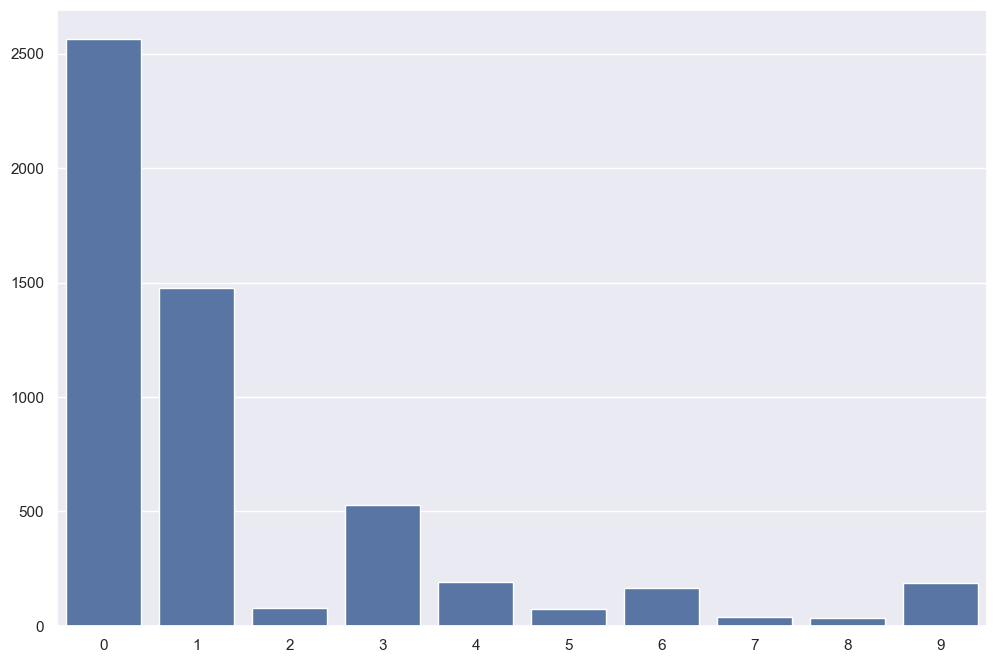

In [34]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans2.labels_
df_bicialpes_prep['Cluster'] = labels

cluster_distrib = df_bicialpes_prep['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

In [35]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_bicialpes_prep.groupby('Cluster').count()

,Weather_Conditions,Junction_Detail
Cluster,,
0,2564,2564
1,1478,1478
2,78,78
3,530,530
4,193,193
5,73,73
6,165,165
7,38,38
8,33,33


In [36]:
# Consultamos algunos de los registros en el clúster 0.
cols_number[kmeans2.labels_ == 0, len(selected_cols)-1]

array([0, 0, 0, ..., 0, 0, 0])

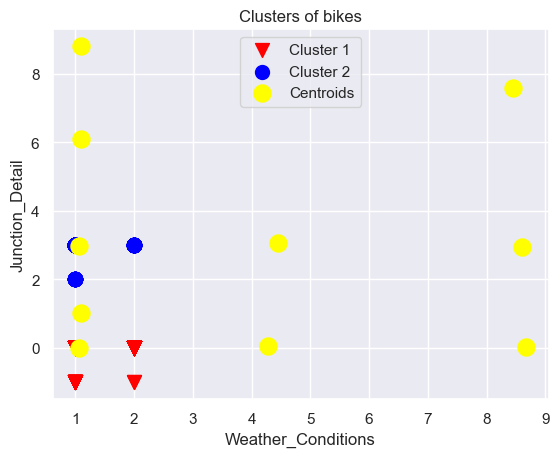

In [37]:
# El análisis lo haremos por pareja de atributos, en este caso weather_conditions y junction detail
plt.scatter(cols_number[kmeans2.labels_ == 0, 0], cols_number[kmeans2.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans2.labels_ == 1, 0], cols_number[kmeans2.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of bikes')
plt.xlabel(selected_cols[0])
plt.ylabel(selected_cols[1])
plt.legend()
plt.show()

In [38]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[',selected_cols[0], ' ' , selected_cols[1], ']]', kmeans2.cluster_centers_)

Centroides: [[ Weather_Conditions   Junction_Detail ]] [[ 1.06318253e+00 -7.41029641e-03]
 [ 1.06562923e+00  2.98105548e+00]
 [ 8.60256410e+00  2.94871795e+00]
 [ 1.09056604e+00  6.10188679e+00]
 [ 1.09844560e+00  8.80310881e+00]
 [ 4.28767123e+00  4.10958904e-02]
 [ 8.67272727e+00  3.03030303e-02]
 [ 8.44736842e+00  7.57894737e+00]
 [ 4.45454545e+00  3.06060606e+00]
 [ 1.10215054e+00  1.00537634e+00]]


#### 3.3.2 Construcción Gaussian Mixture
##### 3.3.2.1 Ajuste del modelo

In [39]:
# Se empezarpa con 2 clústers
gaussianMixture = GaussianMixture(n_components=2, random_state=0)


gaussianMixturep = gaussianMixture.fit(df_bicialpes[selected_cols])
gaussianMixturep.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': 0,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [40]:
cols_number = df_bicialpes[selected_cols].to_numpy()
cols_number

array([[1, 3],
       [1, 0],
       [1, 3],
       ...,
       [5, 3],
       [1, 6],
       [1, 0]])

##### 3.3.2.2 Visualización del resultado con Gaussian Mixture

<AxesSubplot: >

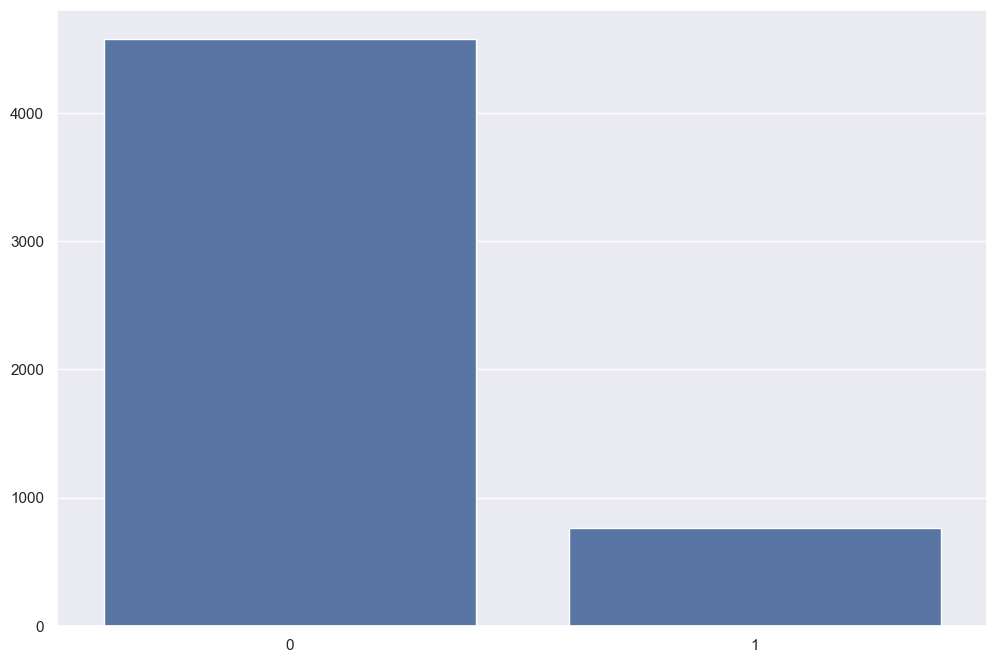

In [41]:
labels = gaussianMixturep.predict(df_bicialpes[selected_cols])

df_bicialpes['Cluster'] = labels
cluster_distrib = df_bicialpes['Cluster'].value_counts()

fig = plt.figure(figsize=(12, 8))
sns.barplot(x = cluster_distrib.index, y = cluster_distrib.values, color='b')

In [42]:
# Verfificar el número de elementos por clúster y las variables utilizadas
df_bicialpes.groupby('Cluster').count()

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
Cluster,,,,,,,,,,,,,,
0,4576,4576,4562,4576,4576,4576,4576,4576,4576,4576,4576,4576,4576,4576
1,762,762,757,762,762,762,762,762,762,762,762,762,762,762


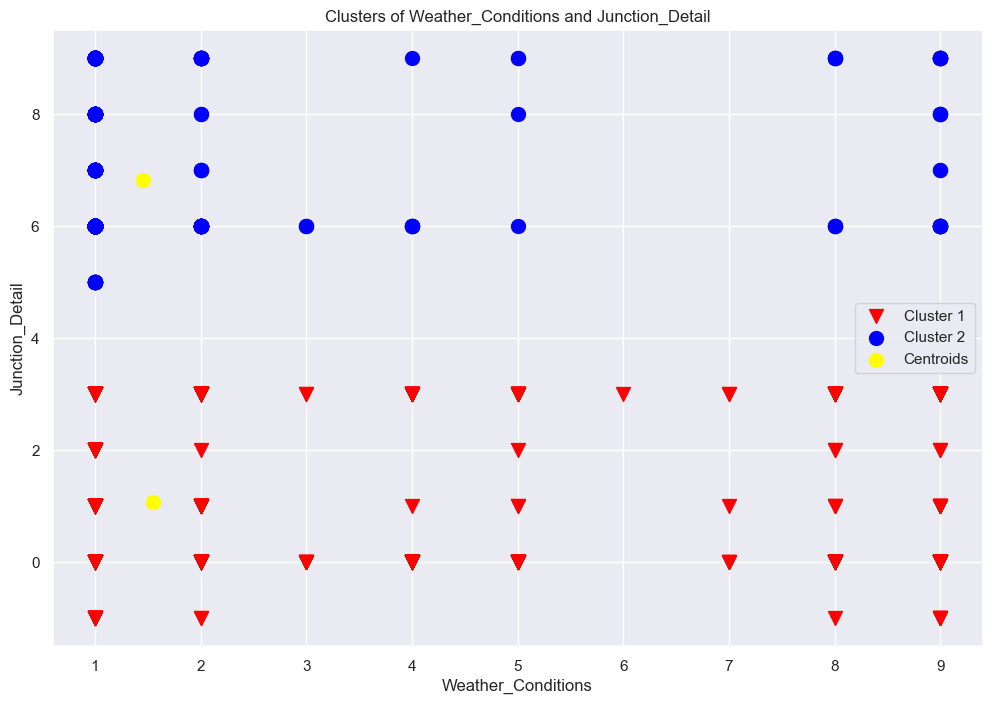

In [43]:
centers = gaussianMixturep.means_

plt.figure(figsize=(12, 8))
plt.scatter(cols_number[gaussianMixturep.predict(df_bicialpes[selected_cols]) == 0, 0], cols_number[gaussianMixturep.predict(df_bicialpes[selected_cols]) == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[gaussianMixturep.predict(df_bicialpes[selected_cols]) == 1, 0], cols_number[gaussianMixturep.predict(df_bicialpes[selected_cols]) == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.title('Clusters of Weather_Conditions and Junction_Detail')
plt.xlabel(selected_cols[0])
plt.ylabel(selected_cols[1])
plt.scatter(centers[:, 0], centers[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [44]:
# Revisar los valores de los centroides de los clústeres generados
print('Centroides: [[',selected_cols[0], ' ' , selected_cols[1], ']]', centers)

Centroides: [[ Weather_Conditions   Junction_Detail ]] [[1.54567725 1.0795153 ]
 [1.45131937 6.82248933]]


##### 3.3.2.3 Número optimo de clusteres de acuerdo al metodo del codo

In [45]:
def plot_distortion(data, k_min=1, k_max=11, ylabel = 'Distortion', xlabel = 'Number of clusters', title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        gmm = GaussianMixture(n_components=i, random_state=0)
        gmm.fit(data)
        distortions.append(gmm.bic(data))
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

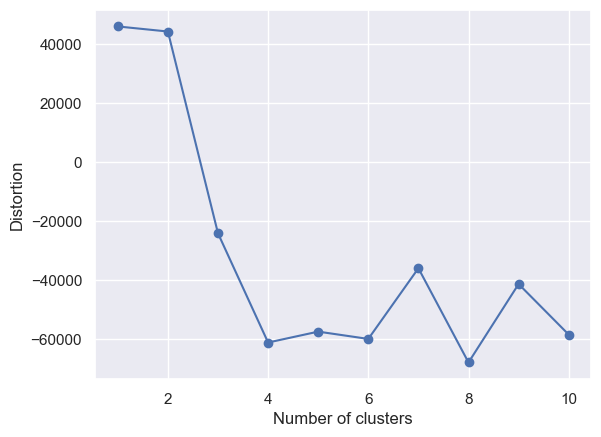

In [46]:
plot_distortion(df_bicialpes[selected_cols],1,11)

#### 3.3.3 Construcción DBSCAN


##### 3.3.3.1 Ajuste del modelo

In [47]:
#Se utilizará el valor 1.5 en el parametro epsilon para empezar y 200 en minPts.

dbscan = DBSCAN(eps=1.5, min_samples=200)

#dbscan.fit_predict(df_bicialpes.iloc[:,[6,11]].values)
lbs = dbscan.fit_predict(cols_number)
np.unique(lbs)

array([-1,  0,  1])

##### 3.3.3.2 Visualización de los datos con DBSCAN

<AxesSubplot: >

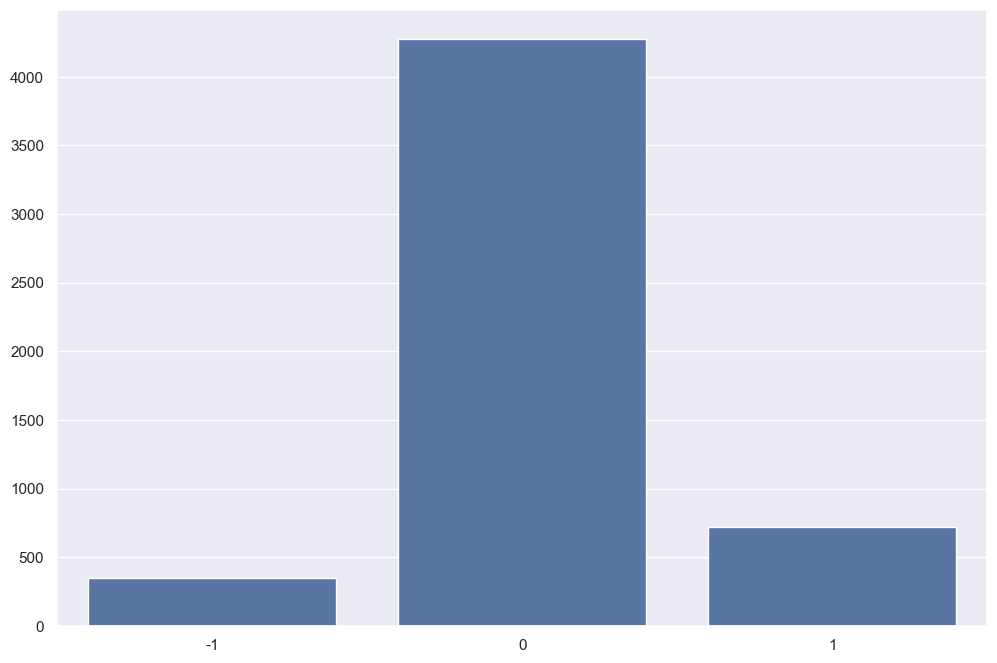

In [48]:
#Para emprezar se utilizarán 2 clusters
df_bicialpes['Cluster'] = lbs
cluster_distrib = df_bicialpes['Cluster'].value_counts()

fig = plt.figure(figsize=(12, 8))
sns.barplot(x = cluster_distrib.index, y = cluster_distrib.values, color='b')

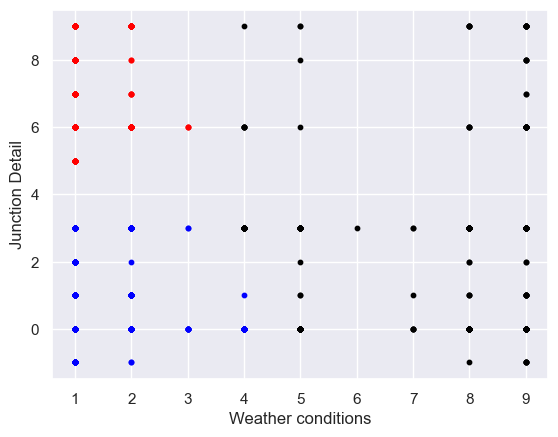

In [49]:
#Graficamos los puntos con 2 clusters mas el "ruido".
plt.scatter(cols_number[lbs == -1, 0], cols_number[lbs == -1, 1], s = 10, c = 'black') 

plt.scatter(cols_number[lbs == 0, 0], cols_number[lbs == 0, 1], s = 10, c = 'blue')
plt.scatter(cols_number[lbs == 1, 0], cols_number[lbs == 1, 1], s = 10, c = 'red')
plt.scatter(cols_number[lbs == 2, 0], cols_number[lbs == 2, 1], s = 10, c = 'green')
plt.scatter(cols_number[lbs == 3, 0], cols_number[lbs == 3, 1], s = 10, c = 'brown')
plt.scatter(cols_number[lbs == 4, 0], cols_number[lbs == 4, 1], s = 10, c = 'pink')
plt.scatter(cols_number[lbs == 5, 0], cols_number[lbs == 5, 1], s = 10, c = 'yellow')      
plt.scatter(cols_number[lbs == 6, 0], cols_number[lbs == 6, 1], s = 10, c = 'silver')

plt.xlabel('Weather conditions')
plt.ylabel('Junction Detail')
plt.show()


##### 3.3.3.3 Numero optimo de epsilon dado el metodo del codo

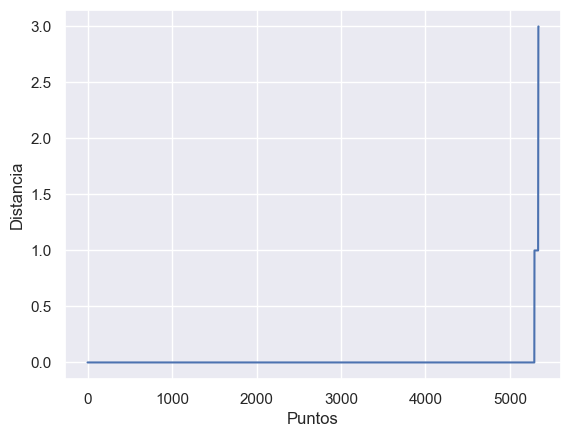

El valor óptimo de epsilon es: 1.0


In [50]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5).fit(cols_number)

distances, indices = nbrs.kneighbors(cols_number)

distances = np.sort(distances[:,4], axis=0)

plt.plot(distances)
plt.xlabel("Puntos")
plt.ylabel("Distancia")
plt.show()

kneedle = KneeLocator(np.arange(len(distances)), distances, curve='convex', direction='increasing')
epsilon = distances[kneedle.knee]

print(f"El valor óptimo de epsilon es: {epsilon}")


##### 3.3.3.4 Construcción de nuevo modelo con epsilon actualizado y numero de clusters optimos

<AxesSubplot: >

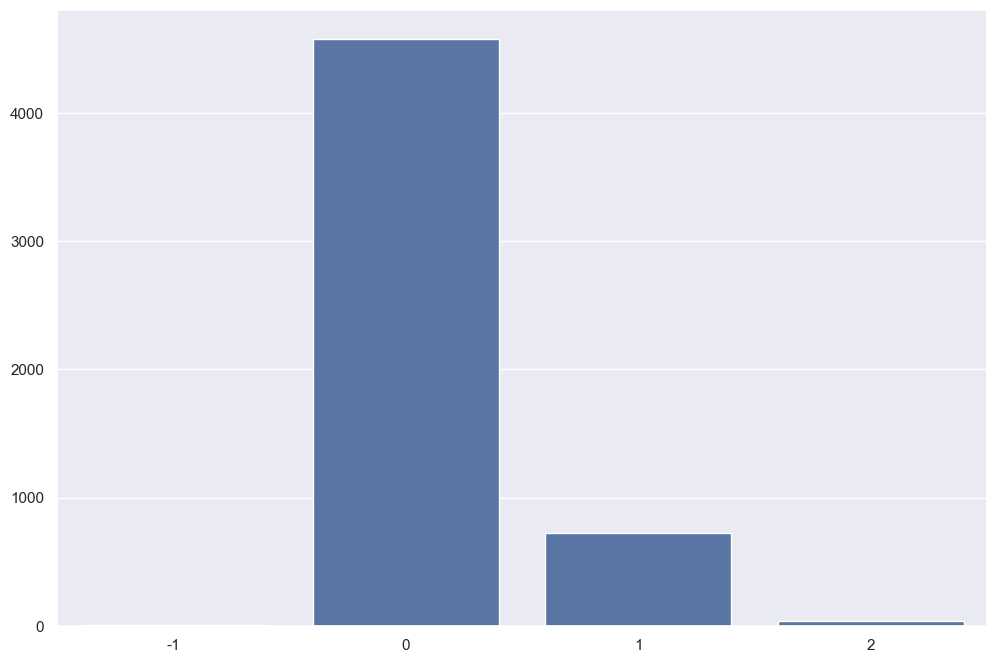

In [51]:
#De acuerdo al paso anterior, utilizaremos 1 como epsilon
dbscan2 = DBSCAN(eps=1, min_samples=5)
lbs2 = dbscan2.fit_predict(cols_number)
df_bicialpes['Cluster'] = lbs2
cluster_distrib = df_bicialpes['Cluster'].value_counts()

fig = plt.figure(figsize=(12, 8))
sns.barplot(x = cluster_distrib.index, y = cluster_distrib.values, color='b')


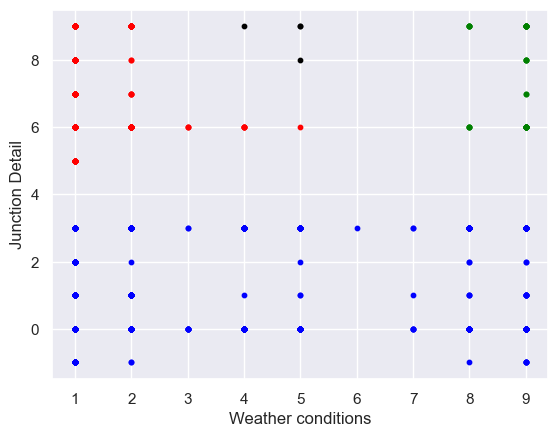

In [52]:
plt.scatter(cols_number[lbs2 == -1, 0], cols_number[lbs2 == -1, 1], s = 10, c = 'black') 

plt.scatter(cols_number[lbs2 == 0, 0], cols_number[lbs2 == 0, 1], s = 10, c = 'blue')
plt.scatter(cols_number[lbs2 == 1, 0], cols_number[lbs2 == 1, 1], s = 10, c = 'red')
plt.scatter(cols_number[lbs2 == 2, 0], cols_number[lbs2 == 2, 1], s = 10, c = 'green')
plt.scatter(cols_number[lbs2 == 3, 0], cols_number[lbs2 == 3, 1], s = 10, c = 'brown')
plt.scatter(cols_number[lbs2 == 4, 0], cols_number[lbs2 == 4, 1], s = 10, c = 'pink')
plt.scatter(cols_number[lbs2 == 5, 0], cols_number[lbs2 == 5, 1], s = 10, c = 'yellow')      
plt.scatter(cols_number[lbs2 == 6, 0], cols_number[lbs2 == 6, 1], s = 10, c = 'silver')

plt.xlabel('Weather conditions')
plt.ylabel('Junction Detail')
plt.show()

## 4. Validación

### 4.1 Validación cuantitativa

#### 4.1.1 Evaluación clusteres obtenidos K-means


### 4.2 Validación cualitativa KMeans

In [53]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2 3 4 5 6 7 8 9]


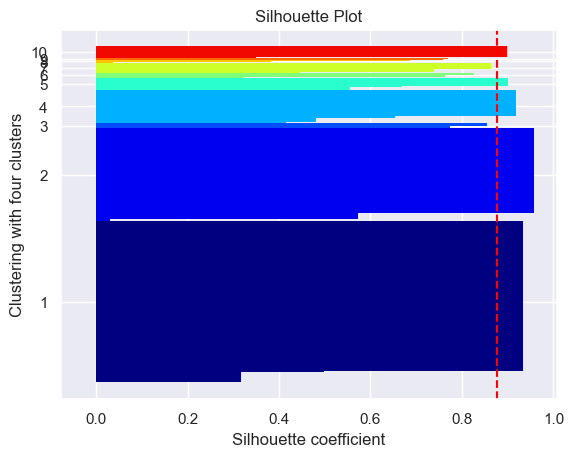

In [54]:
# Esta función puede tardar varios minutos
plot_silhouette(data = df_bicialpes[selected_cols], 
                labels = kmeans2.labels_, 
                ylabel = 'Clustering with four clusters')

### 4.3 Validación cualitativa Gaussian Mixture

[0 1]


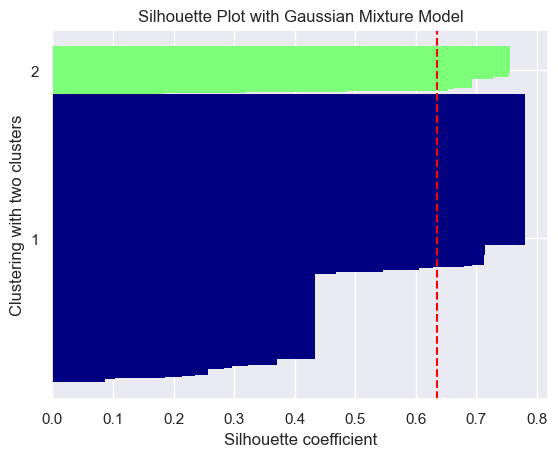

In [55]:
plot_silhouette(data = df_bicialpes[selected_cols],
                labels= gaussianMixturep.predict(df_bicialpes[selected_cols]),
                ylabel = 'Clustering with two clusters',
                title='Silhouette Plot with Gaussian Mixture Model')
                                    

### 4.4 Evaluación Cualitativa DBSCAN

In [56]:
silhouette_avg = silhouette_score(cols_number, dbscan2.labels_)
print("El coeficiente de silueta promedio es:", silhouette_avg)

El coeficiente de silueta promedio es: 0.6013210024821564


[-1  0  1  2]


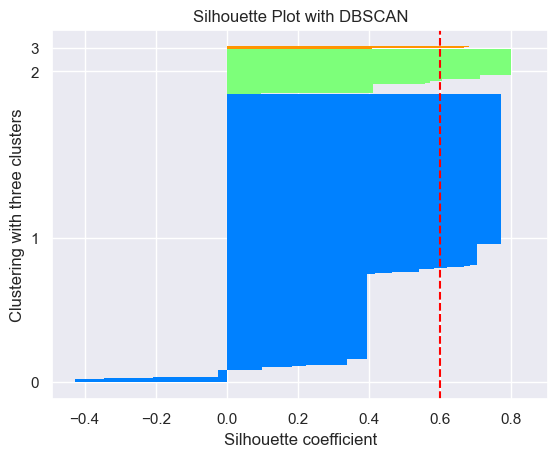

In [57]:
plot_silhouette(data = df_bicialpes[selected_cols],
                labels= lbs2,
                ylabel = 'Clustering with three clusters',
                title='Silhouette Plot with DBSCAN')

## 5. Visualización